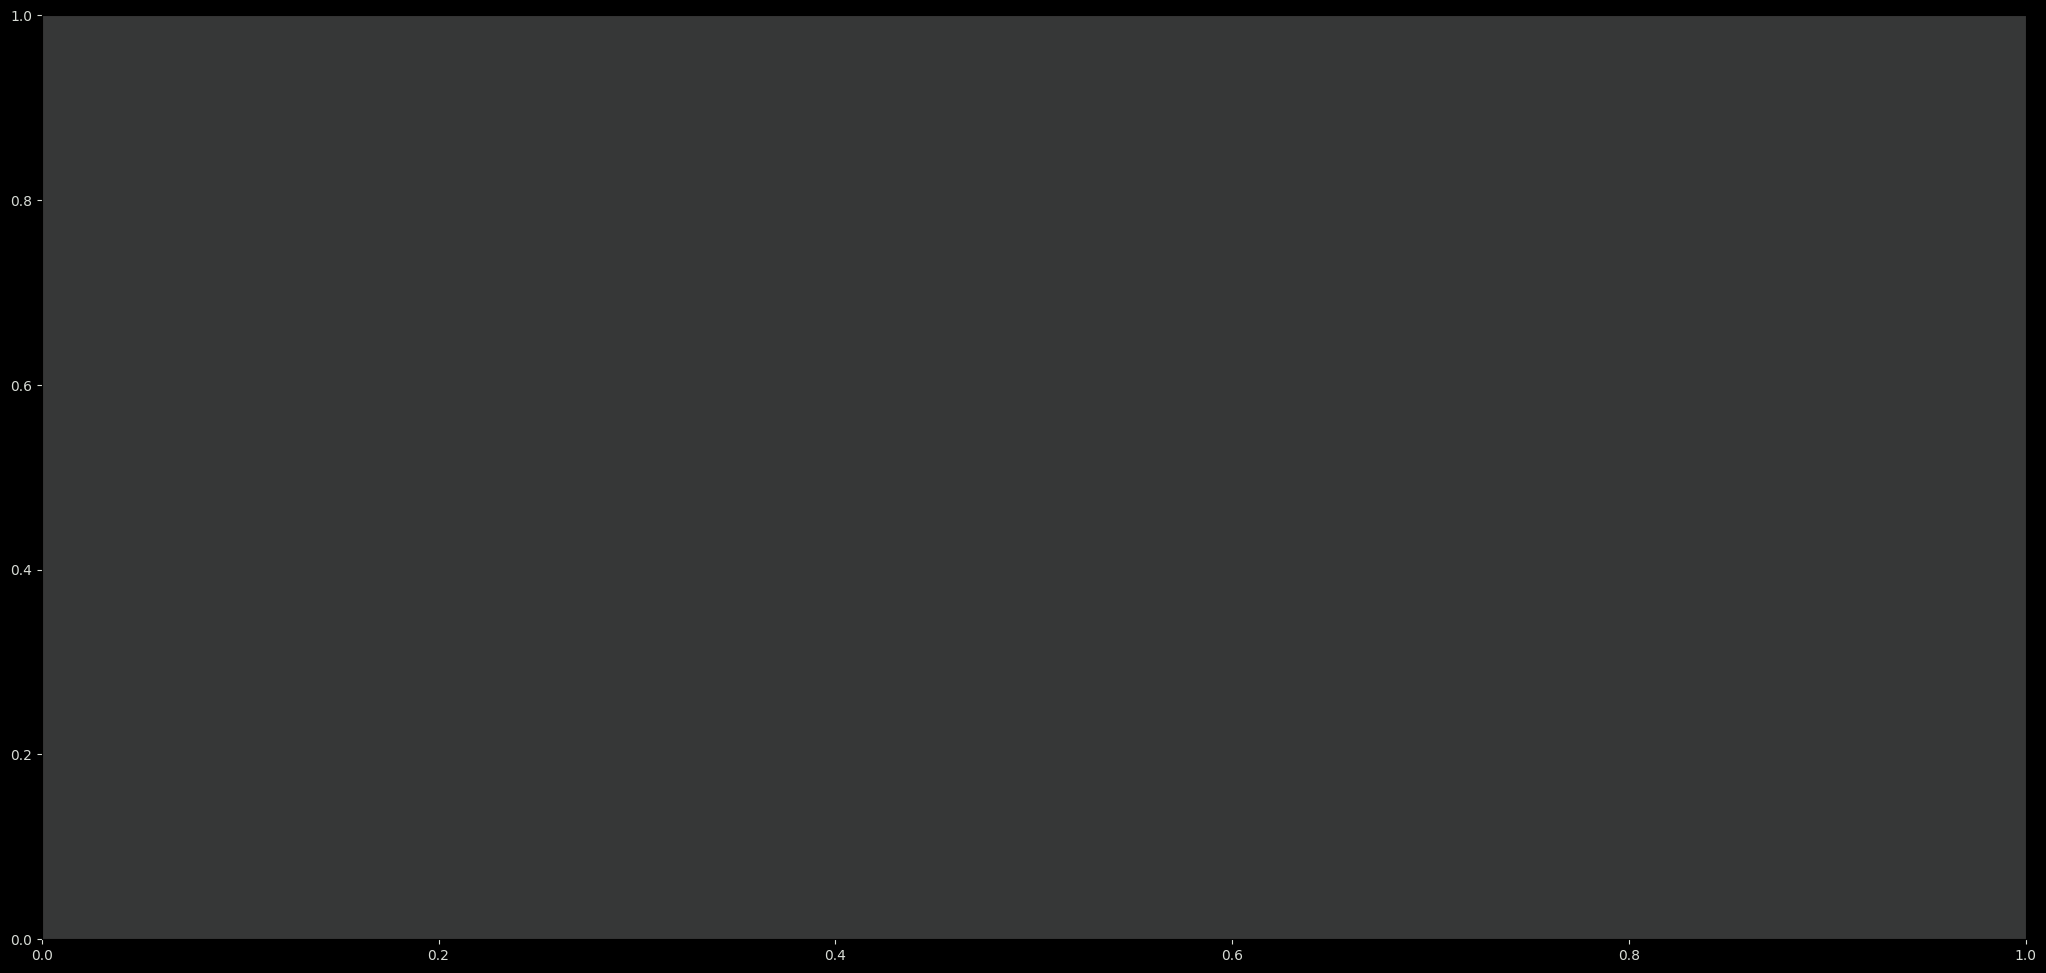

In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from scipy.optimize import curve_fit
import tkinter as tk
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk

# Gaussian function to fit
def gaussian(x, a, mean, sigma, C):
    return a * np.exp(-0.5 * ((x - mean) / sigma)**2) + C

# Load and plot data
def load_and_plot():
    global x, y, ax, canvas
    filepath = filedialog.askopenfilename()
    if filepath:
        x, y = np.loadtxt(filepath, unpack=True)
        ax.clear()
        ax.plot(x, y, 'o-', color='black', markersize=3, label="Data")
        ax.grid(True)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        canvas.draw()

# Clear data and plot
def clear_data():
    global x, y, ax, canvas
    x, y = np.array([]), np.array([])
    ax.clear()
    ax.grid(False)
    canvas.draw()

# Fit Gaussian to selected data
def onclick(event):
    global coords, x, y, fit_line
    coords.append((event.xdata, event.ydata))
    
    # Remove old fit line if it exists
    if fit_line:
        fit_line.remove()
        fit_line = None
        fit_params_label.config(text="")
    
    if len(coords) == 2:
        x1, x2 = sorted([coords[0][0], coords[1][0]])
        selected_indices = np.where((x >= x1) & (x <= x2))
        selected_x = x[selected_indices]
        selected_y = y[selected_indices]
        
        # Check if selected_y is empty
        if len(selected_y) > 0:
            params, _ = curve_fit(gaussian, selected_x, selected_y, p0=[max(selected_y), np.mean(selected_x), np.std(selected_x), min(selected_y)])
            
            # Create a denser range of x-values for a smoother curve:
            dense_x = np.linspace(min(selected_x), max(selected_x), 1000)  # 1000 points for a smoother curve
            smooth_y = gaussian(dense_x, *params)
            
            # Remove old fit line if it exists
            if fit_line:
                fit_line.remove()
            
            fit_line, = ax.plot(dense_x, smooth_y, color='red', linestyle='-', label="Fit")    # Save reference to line
            
            a, mean, sigma, C = params
            fwhm = 2.355 * sigma
            
            # Update text of label, set proper spacing and font size
            fit_params_label.config(text=f"Mean: {mean:.4f}   Sigma: {sigma:.4f}   FWHM: {fwhm:.4f}   Baseline: {C:.4f}", font=("Helvetica", 20))
        else:
            print("No data points found within the selected range.")
        
        coords = []
        canvas.draw()

fit_line = None  # Variable to store the fit line

# Initialize Tkinter window
root = tk.Tk()
root.title("Data Fitting Tool")
root.configure(bg='black')

# Set up labels
fit_params_label = tk.Label(root, text="", bg="black", fg="white")  
fit_params_label.pack()

# Data initialization
coords = []
x, y = np.array([]), np.array([])

# Set up Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(30, 12))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Figure styling
ax.set_facecolor('xkcd:dark grey')  
fig.patch.set_facecolor('xkcd:black')  
ax.grid(True, color='xkcd:light grey', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='xkcd:light grey')
ax.xaxis.label.set_color('xkcd:light grey')
ax.yaxis.label.set_color('xkcd:light grey')
ax.title.set_color('xkcd:light grey')

# Set up buttons
button_add = tk.Button(root, text="Add File", command=load_and_plot, height=3, width=15)
button_add.pack()

button_clear = tk.Button(root, text="Clear Data", command=clear_data, height=3, width=15)
button_clear.pack()

# Event handling
fig.canvas.mpl_connect('button_press_event', onclick)

# Set up toolbar
toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
toolbar.pack(side=tk.BOTTOM, fill=tk.X)


# Start Tkinter main loop
root.mainloop()

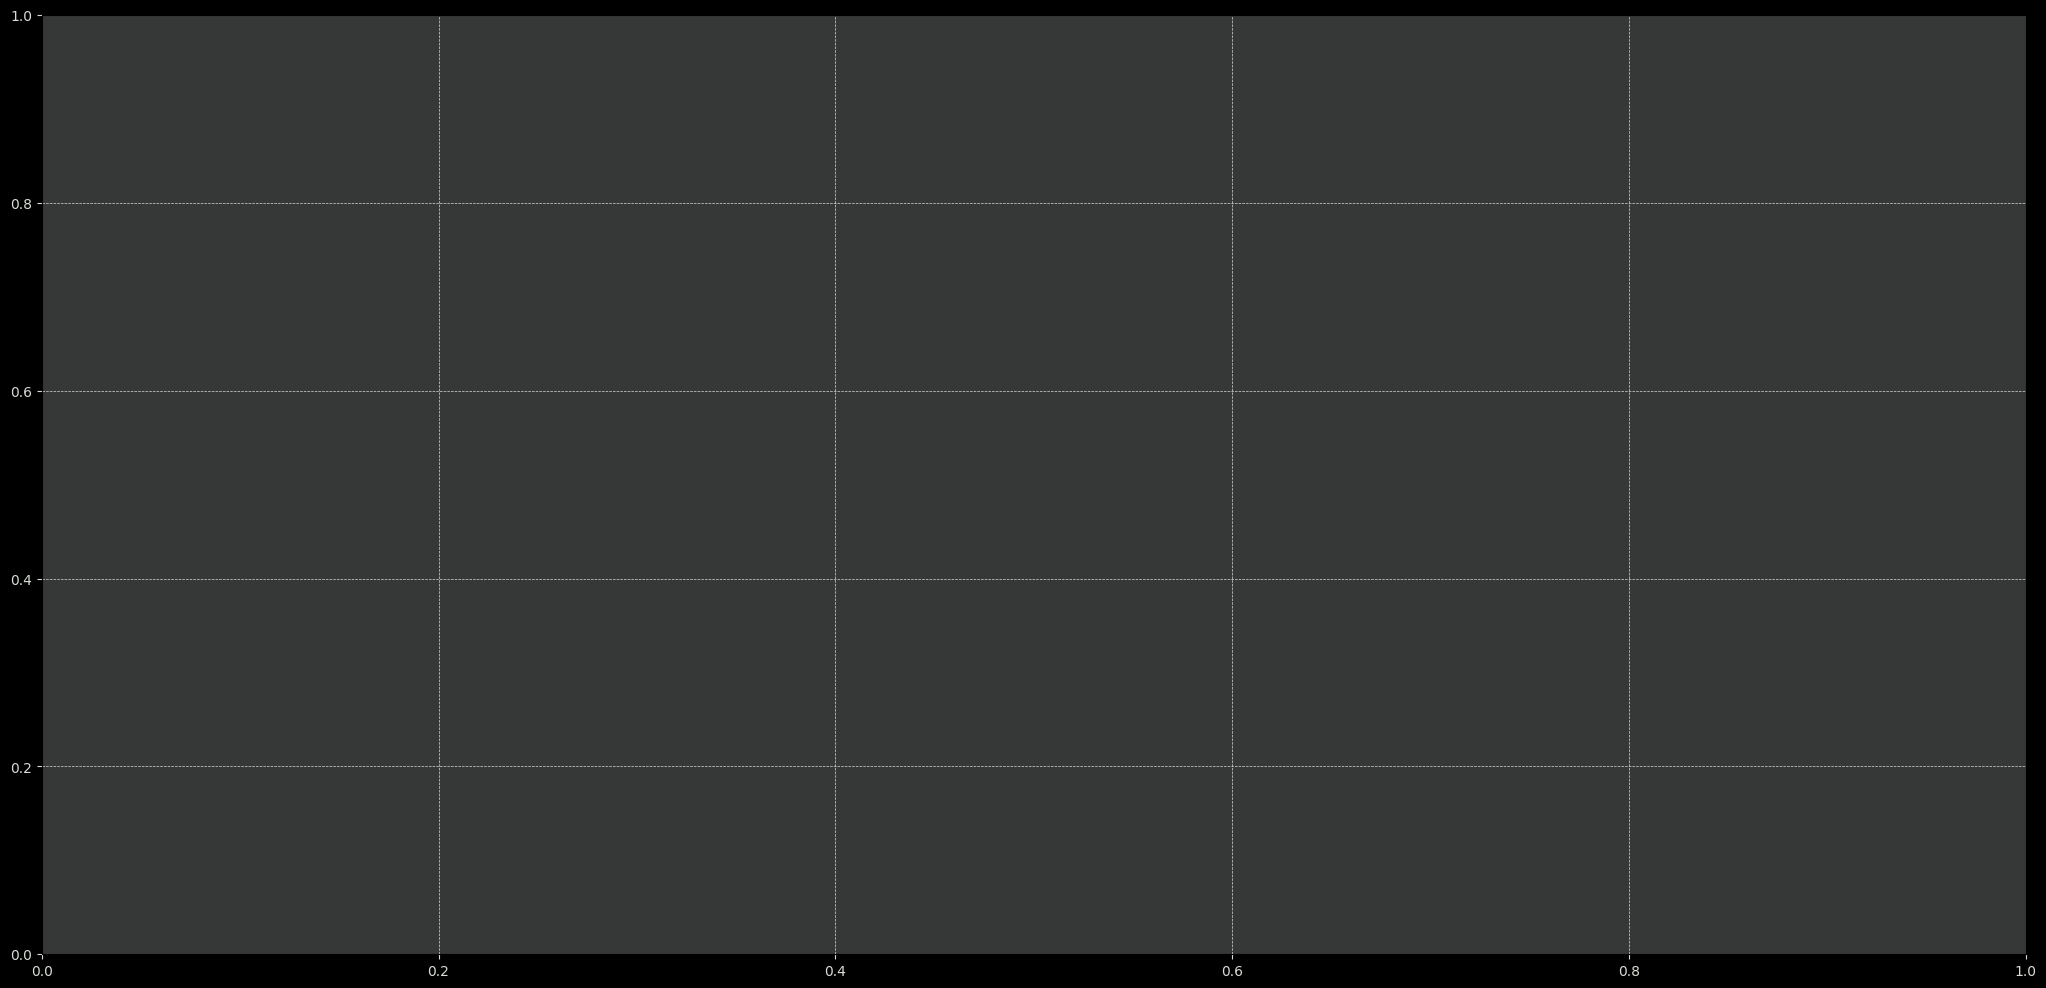

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from scipy.optimize import curve_fit
import tkinter as tk
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk

# Gaussian function to fit
def gaussian(x, a, mean, sigma, C):
    return a * np.exp(-0.5 * ((x - mean) / sigma)**2) + C

# Load and plot data
def load_and_plot():
    global x, y, ax, canvas
    filepath = filedialog.askopenfilename()
    if filepath:
        x, y = np.loadtxt(filepath, unpack=True)
        ax.clear()
        ax.plot(x, y, 'o-', color='black', markersize=3, label="Data")
        ax.grid(True)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        canvas.draw()

# Clear data and plot
def clear_data():
    global x, y, ax, canvas
    x, y = np.array([]), np.array([])
    ax.clear()
    ax.grid(False)
    canvas.draw()

fit_line = None  # Variable to store the fit line

# Fit Gaussian to selected data
def onclick(event):
    global coords, x, y, fit_line
    coords.append((event.xdata, event.ydata))
    
    # Remove old fit line if it exists
    if fit_line:
        fit_line.remove()
        fit_line = None
        fit_params_label.config(text="")
    
    if len(coords) == 2:
        x1, x2 = sorted([coords[0][0], coords[1][0]])
        selected_indices = np.where((x >= x1) & (x <= x2))
        selected_x = x[selected_indices]
        selected_y = y[selected_indices]
        
        # Check if selected_y is empty
        if len(selected_y) > 0:
            params, _ = curve_fit(gaussian, selected_x, selected_y, p0=[max(selected_y), np.mean(selected_x), np.std(selected_x), min(selected_y)])
            
            # Create a denser range of x-values for a smoother curve:
            dense_x = np.linspace(min(selected_x), max(selected_x), 1000)  # 1000 points for a smoother curve
            smooth_y = gaussian(dense_x, *params)
            
            # Remove old fit line if it exists
            if fit_line:
                fit_line.remove()
            
            fit_line, = ax.plot(dense_x, smooth_y, color='red', linestyle='-', label="Fit")    # Save reference to line
            
            a, mean, sigma, C = params
            fwhm = 2.355 * sigma
            
            # Update text of label, set proper spacing and font size
            fit_params_label.config(text=f"Mean: {mean:.4f}   Sigma: {sigma:.4f}   FWHM: {fwhm:.4f}   Baseline: {C:.4f}", font=("Helvetica", 20))
        else:
            print("No data points found within the selected range.")
        
        coords = []
        canvas.draw()



# Initialize Tkinter window
root = tk.Tk()
root.title("Data Fitting Tool")
root.configure(bg='black')

# Create frames for canvas and buttons
canvas_frame = tk.Frame(root, bg='black')
canvas_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

button_frame = tk.Frame(root, bg='black')
button_frame.pack(side=tk.BOTTOM, fill=tk.X, padx=10, pady=10)

# Set up labels
fit_params_label = tk.Label(canvas_frame, text="", bg="black", fg="white")
fit_params_label.pack(pady=5)

# Data initialization
coords = []
x, y = np.array([]), np.array([])

# Set up Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(30, 12))
canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Figure styling
ax.set_facecolor('xkcd:dark grey')
fig.patch.set_facecolor('xkcd:black')
ax.grid(True, color='xkcd:light grey', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='xkcd:light grey')
ax.xaxis.label.set_color('xkcd:light grey')
ax.yaxis.label.set_color('xkcd:light grey')
ax.title.set_color('xkcd:light grey')

# Set up buttons inside button_frame
button_add = tk.Button(button_frame, text="Add File", command=load_and_plot, height=3, width=15)
button_add.pack(side=tk.LEFT, padx=5)

button_clear = tk.Button(button_frame, text="Clear Data", command=clear_data, height=3, width=15)
button_clear.pack(side=tk.LEFT, padx=5)

# Event handling
fig.canvas.mpl_connect('button_press_event', onclick)

# Set up toolbar
toolbar = NavigationToolbar2Tk(canvas, canvas_frame)
toolbar.update()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
toolbar.pack(side=tk.BOTTOM, fill=tk.X)

# Start Tkinter main loop
root.mainloop()